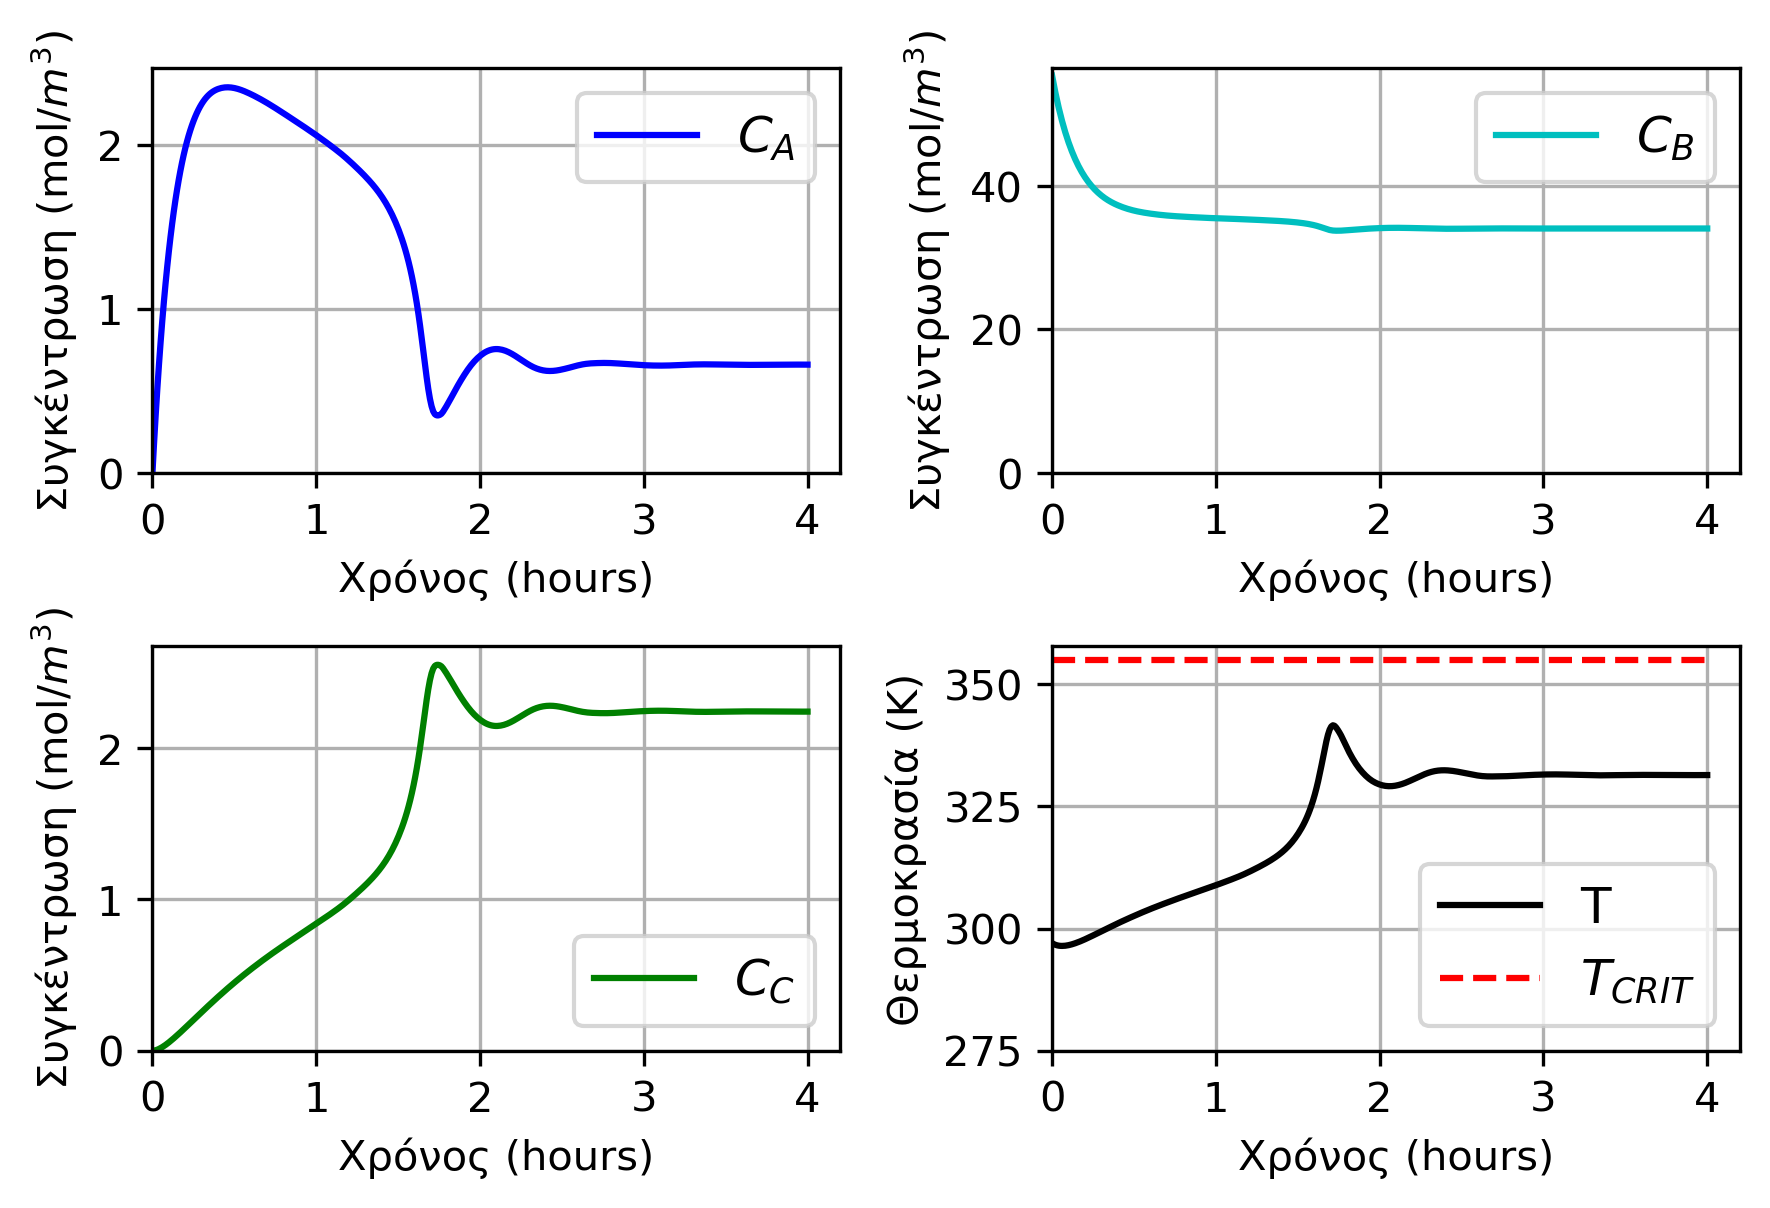

In [25]:
# Define Solve the system of ODEs
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equations (converted from SXA_I_Example_7p10 function)
def SXA_I_Example_7p2(t, x):
    # Model Parameters
    rho_A = 14.8        # molar density of propylene oxide (kmol*m^-3)
    rho_B = 55.3        # molar density of water (kmol*m^-3)
    rho_M = 24.7        # molar density of methanol (kmol*m^-3)
    UA = 7262           # Heat transfer coefficient via cooling spiral (cal/h/K)
    Tco = 288.7         # Coolant entry Temperature (K)
    To = 297            # Reactor Inlet Temperature (K)
    Cpw = 18            # Heat Capacity Water (kcal/kmol/K)
    CpA = 35            # Heat Capacity Propylene Oxide (kcal/kmol/K)
    CpB = 18            # Heat Capacity Water (kcal/kmol/K)
    CpM = 19.5          # Heat Capacity Methanol (kcal/kmol/K)
    k0 = 16.96e12       # Frequency coefficient (1/h)
    E = 18012           # Activation Energy (kcal/kmol)
    DHr = -20013        # Heat of Reaction (kcal/kmol)
    V = 1.89            # Reactor Volume (m^3)
    FAo = 36.3          # Propylene Oxide Inlet Stream (kmol/h)
    FBo = 453.6         # Water Inlet Stream (kmol/h)
    FMo = 45.4          # Methanol Inlet Stream (kmol/h)
    mc = 2.27 / 18 * 3600   # Coolant Mass Flow Rate (kmol/h)
    CAo = 2.904         # Inlet Stream Concentration Propylene Oxide (kmol/m^3)
    CBo = 36.288        # Inlet Stream Concentration Water (kmol/m^3)
    R = 1.987           # Universal Gas Constant (kcal/kmol/K)

    # Variables
    CA, CB, CC, CM, T = x  # Unpack variables from input array x

    # Auxiliary Equations
    Qo = FAo / rho_A + FBo / rho_B + FMo / rho_M
    k = k0 * np.exp(-E / (R * T))

    # Differential Equations
    dCA_dt = Qo * (CAo - CA) / V - k * CA
    dCB_dt = Qo * (CBo - CB) / V - k * CA
    dCC_dt = -Qo * CC / V + k * CA
    dCM_dt = Qo * (3.632 - CM) / V
    dT_dt = (-(FAo * CpA + FBo * CpB + FMo * CpM) * (T - To) - V * DHr * k * CA - mc * Cpw * (T - Tco) * (1 - np.exp(-UA / (mc * Cpw)))) / \
            (CA * V * CpA + CB * V * CpB + CM * CpM * V)

    return [dCA_dt, dCB_dt, dCC_dt, dCM_dt, dT_dt]

# Set time span for the integration (e.g., from t=0 to t=10 hours)
t_span = (0, 4)  # time span in hours
t_eval = np.linspace(0, 4, 400)  # time points for evaluation

# Initial concentrations: [CA0]
initial_conditions = [0, 55.3, 0, 0, 297]  # Initial values for [CA]

# Solve the ODE system using solve_ivp
sol = solve_ivp(SXA_I_Example_7p2, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for each component
CA = sol.y[0, :]
CB = sol.y[1, :]
CC = sol.y[2, :]
CM = sol.y[3, :]
T  = sol.y[4, :]
time = sol.t

# Plotting results in subplots
plt.figure(dpi=300)

# Subplot 1: C_A vs t
plt.subplot(2, 2, 1)
plt.plot(time, CA, 'b-', linewidth=1.5)
plt.legend(['$C_A$'], fontsize=12)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0
plt.xlabel('Χρόνος (hours)', fontsize=10)
plt.ylabel('Συγκέντρωση (mol/$m^3$)', fontsize=10)

# Subplot 2: C_B vs t
plt.subplot(2, 2, 2)
plt.plot(time, CB, 'c-', linewidth=1.5)
plt.legend(['$C_B$'], fontsize=12)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0
plt.xlabel('Χρόνος (hours)', fontsize=10)
plt.ylabel('Συγκέντρωση (mol/$m^3$)', fontsize=10)

# Subplot 3: C_C vs t
plt.subplot(2, 2, 3)
plt.plot(time, CC, 'g-', linewidth=1.5)
plt.legend(['$C_C$'], fontsize=12)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0
plt.xlabel('Χρόνος (hours)', fontsize=10)
plt.ylabel('Συγκέντρωση (mol/$m^3$)', fontsize=10)

# Subplot 4: T vs t
plt.subplot(2, 2, 4)
plt.plot(time, T, 'k-', linewidth=1.5)
plt.plot([0, 4], [355, 355], 'r--', linewidth=1.5)
plt.legend(['T','$T_{{CRIT}}$'], fontsize=12)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=275)  # Y-axis starts at 275
plt.xlabel('Χρόνος (hours)', fontsize=10)
plt.ylabel('Θερμοκρασία (Κ)', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


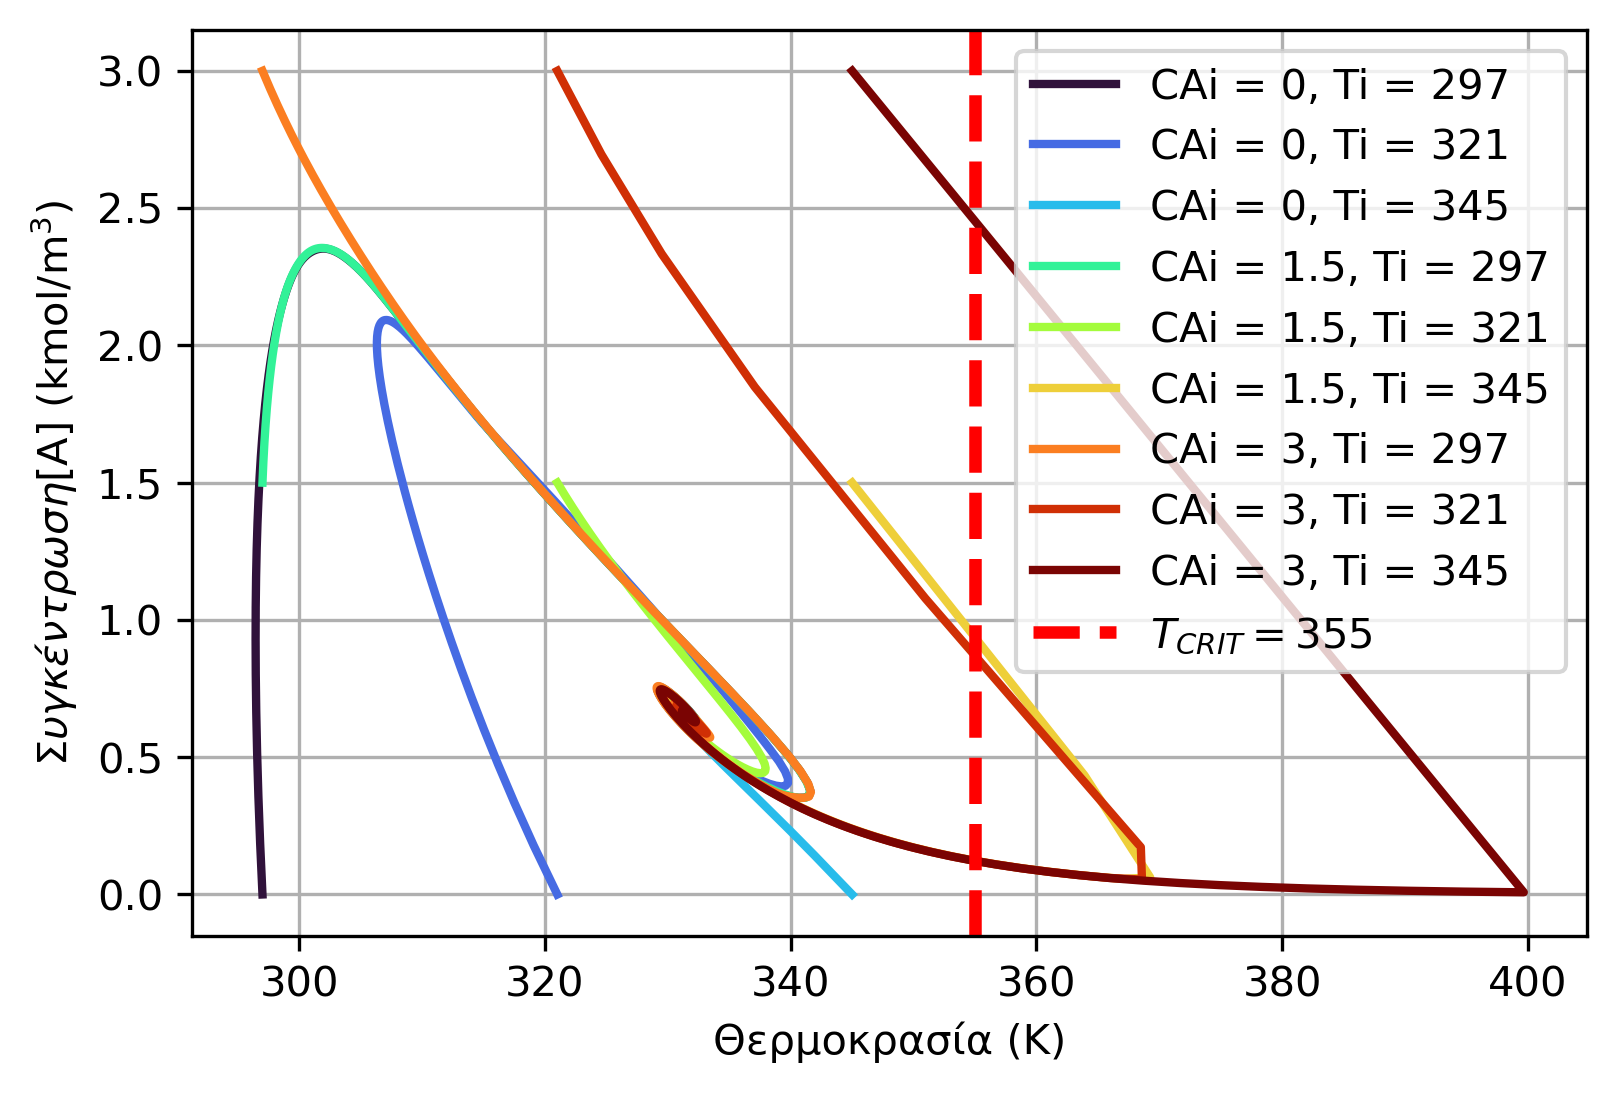

In [22]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Set time span for the integration (e.g., from t=0 to t=10 hours)
t_span = (0, 4)  # time span in hours
t_eval = np.linspace(0, 4, 400)  # time points for evaluation

# Generate all combinations of CAi and Ti
CAi_values = [0, 1.5, 3]
Ti_values = [297, 321, 345]
init_combinations = list(itertools.product(CAi_values, Ti_values))
results = []  # To store the results for each combination

# Solve the ODE for each initial condition combination
for CAi, Ti in init_combinations:
    Init_Cond = [CAi, 55.3, 0, 0, Ti]
    sol = solve_ivp(SXA_I_Example_7p2, t_span, Init_Cond, t_eval=t_eval)
    results.append((sol, f'CAi = {CAi}, Ti = {Ti}'))  # Store result and label

# Plotting
plt.figure(dpi=300)
cmap = plt.get_cmap('turbo')
colors = cmap(np.linspace(0, 1, len(init_combinations)))

# Plot CA (Concentration of Propylene Oxide) vs T for each solution
for i, (sol, label) in enumerate(results):
    CA_values = sol.y[0]  # Concentration of A (CA) from the solution
    T_values = sol.y[4]   # Temperature (T) from the solution
    plt.plot(T_values, CA_values, color=colors[i], label=label, linewidth=2)

# Adding the red dashed line for safe temperature limit
plt.axvline(x=355, color='r', linestyle='--', linewidth=3, label=r'$T_{CRIT} = 355$')

# Final plot settings
plt.xlabel('Θερμοκρασία (K)')
plt.ylabel('$Συγκέντρωση [Α]$ (kmol/m$^3$)')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()
